In [360]:
import json
import psycopg2
import time
import pandas as pd
from datetime import datetime
import numpy as np
import math
import pickle
import os
import pandas.io.sql as sqlio
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
'''conn = psycopg2.connect(
  port='5432',
  host= "shopify-merchant-dump.ccm9mnr5avgs.ap-south-1.rds.amazonaws.com",
  user= "softtouchlenses_4e0b7c925f8444429457581f35678aea",
  password="softtouchlenses_4e0b7c925f8444429457581f35678aea_password",
  database= "softtouchlenses_4e0b7c925f8444429457581f35678aea_db")
'''
conn = psycopg2.connect(
  host='shopify-merchant-dump.ccm9mnr5avgs.ap-south-1.rds.amazonaws.com',
  port='5432',
  user='paakhi_b014108f50994e35ab8fa4e2dc26d612',
  password='paakhi_b014108f50994e35ab8fa4e2dc26d612_password',
  database='paakhi_b014108f50994e35ab8fa4e2dc26d612_db')

In [362]:
q='''SELECT created_at as created, id as order_iD, total_price as order_amount, email as user_id from orders WHERE
cancelled_at is NULL;
'''
e=pd.read_sql(q,conn)

<ipython-input-362-f8442b19a9e2>:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  e=pd.read_sql(q,conn)


In [363]:
e

,created,order_id,order_amount,user_id
0,2023-11-25 16:52:34,5404755329281,4460.0,kathleenannpable@gmail.com
1,2023-11-25 15:51:55,5404697428225,9510.0,
2,2023-11-25 13:58:39,5404613640449,4910.0,marcothiry@gmail.com
3,2023-11-25 13:44:33,5404597584129,6210.0,rezaulkabir@gmail.com
4,2023-11-25 12:52:44,5404543058177,3410.0,aftabchowdhury99@gmail.com
...,...,...,...,...
726,2023-11-26 18:03:05,5406566711553,9810.0,roseimani1022@gmail.com
727,2023-11-26 17:07:20,5406528241921,1310.0,
728,2023-11-26 15:50:12,5406478303489,1310.0,
729,2023-11-26 10:58:38,5406277075201,2910.0,fantu2005@hotmail.com


In [364]:
#e=e[e['created']<='2023/05/29']
#e=e[e['created']>='2023/11/29']
#e.info()
e['user_id'].nunique()

495

In [365]:
e['WeekCount']=e['created'].dt.strftime('%Y-w%U')

In [366]:
len(e)

731

In [367]:
e=e.sort_values('created')
WeekList=e['WeekCount'].unique()

In [368]:
e['WeekCount'].value_counts().tail(50)

2023-w42    331
2023-w46    140
2023-w45    123
2023-w47     75
2023-w44     54
2023-w48      8
Name: WeekCount, dtype: int64

In [369]:
List=WeekList
List

array(['2023-w42', '2023-w44', '2023-w45', '2023-w46', '2023-w47',
       '2023-w48'], dtype=object)

In [370]:
e["New"] = 0
e['TrxnRank'] = e.groupby('user_id')['created'].rank(method='first')
e.loc[e['TrxnRank']==1,'New'] = 1

In [371]:
e['OrderDate']=e['created'].dt.date
e['OrderDate']=pd.to_datetime(e['OrderDate'])
e['DeltaDaysinOrders']=(e.groupby('user_id').OrderDate.shift() - e.OrderDate).dt.days.abs()
e['DeltaOrderValues']=(e.groupby('user_id').order_amount.shift() - e.order_amount)

In [372]:
k=e
k['OrderDate']=k['created'].dt.date
k['OrderDate']=pd.to_datetime(k['OrderDate'])
WeekList=k['WeekCount'].unique()

In [373]:
e['New'].value_counts()

1    495
0    236
Name: New, dtype: int64

In [374]:
e[e['New'] == 0]

,created,order_id,order_amount,user_id,WeekCount,New,TrxnRank,OrderDate,DeltaDaysinOrders,DeltaOrderValues
710,2023-10-18 16:01:23,5360198156545,9910.0,kamrulhasankhokon@gmail.com,2023-w42,0,2.0,2023-10-18,0.0,-7400.0
673,2023-10-18 16:05:59,5360202383617,2930.0,naimul.islam9@gmail.com,2023-w42,0,2.0,2023-10-18,1.0,3022.5
375,2023-10-18 16:06:19,5360202547457,2930.0,mustafizur.rahman.khan@gmail.com,2023-w42,0,2.0,2023-10-18,0.0,16470.0
677,2023-10-18 16:06:51,5360203170049,3330.0,rabiah.chowdhury@gmail.com,2023-w42,0,2.0,2023-10-18,0.0,3220.0
668,2023-10-18 16:07:57,5360203825409,23190.0,gmsgarments@msn.com,2023-w42,0,2.0,2023-10-18,0.0,23860.0
...,...,...,...,...,...,...,...,...,...,...
1,2023-11-25 15:51:55,5404697428225,9510.0,,2023-w47,0,154.0,2023-11-25,1.0,-8200.0
729,2023-11-26 10:58:38,5406277075201,2910.0,fantu2005@hotmail.com,2023-w48,0,2.0,2023-11-26,10.0,-500.0
728,2023-11-26 15:50:12,5406478303489,1310.0,,2023-w48,0,155.0,2023-11-26,1.0,8200.0
727,2023-11-26 17:07:20,5406528241921,1310.0,,2023-w48,0,156.0,2023-11-26,0.0,0.0


In [375]:
e['WeekCount'].value_counts().tail(50)

e['OrderDate']=e['created'].dt.date
e['OrderDate']=pd.to_datetime(k['OrderDate'])

x1=e.groupby('user_id').agg(
          LastDate=pd.NamedAgg(column='OrderDate', aggfunc= 'max'),
          FirstDate=pd.NamedAgg(column='OrderDate', aggfunc='min'),
          Frequency=pd.NamedAgg(column='order_id', aggfunc='nunique'),
          AOV=pd.NamedAgg(column='order_amount', aggfunc='mean'),
          OrderValue=pd.NamedAgg(column='order_amount', aggfunc='sum'),
          MeanDaysDelta=pd.NamedAgg(column='DeltaDaysinOrders', aggfunc='mean'),
          MeanOVDelta=pd.NamedAgg(column='DeltaOrderValues', aggfunc='mean'),
          New=pd.NamedAgg(column='New',aggfunc='mean')
      ).reset_index()
globalmaxdate=e['OrderDate'].max()
x1['Recency']=globalmaxdate-x1['LastDate']
x1['Recency']=x1['Recency'].dt.days.abs()
x1['ActivatedQuater']=x1['FirstDate'].dt.to_period('Q')
x1['MaturityAge']=x1['LastDate']-x1['FirstDate']
x1['MaturityAge']=x1['MaturityAge'].dt.days.abs()
x1['MeanDaysDelta']=x1['MeanDaysDelta'].fillna(0)
x1['MeanOVDelta']=x1['MeanOVDelta'].fillna(0)

r_labels, f_labels,AOV_labels, m_labels,DelAOV_labels = range(4, 0, -1), range(1,5), range(1,5),range(1,5),range(1,5)
x1['r_score'] = x1['Recency'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = r_labels)).astype('int64')
x1['f2d_score'] = x1['Frequency'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = f_labels)).astype('int64')
x1['AOV_score'] = x1['AOV'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = AOV_labels)).astype('int64')
x1['m_score'] = x1['MaturityAge'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = m_labels)).astype('int64')
x1['DelAOV'] = x1['MeanOVDelta'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = DelAOV_labels)).astype('int64')
x1['SumScore'] = x1['r_score'] + x1['f2d_score'] + x1['m_score'] + x1['AOV_score']+ x1['DelAOV']

def CohortLables_1(df):
  if (df['New']==1 and df['AOV_score']>2):
    return 'New&High Value'
  elif (df['New']==1 and df['AOV_score']<=2):
    return 'New&Low Value'
  elif (df['New']<1 and df['AOV_score']<=2):
    return 'Returning&Low Value'
  else:
    return 'Returning&High Value'

def CohortLables_2(df):
  if ((df['SumScore'] >= 18) and (df['Frequency']>1)):
      return 'Champions'
  elif ((df['m_score'] <=1) and (df['SumScore'] >= 10)and (df['SumScore'] < 18) and (df['r_score'] >1)):
      return 'New&Potential'
  elif ((df['m_score'] >1) and (df['SumScore'] >= 14)and (df['SumScore'] < 18)and (df['r_score'] >1)):
      return 'Mature&Loyal'
  elif ((df['m_score'] >1) and (df['SumScore'] >= 10)and (df['SumScore'] < 14)and (df['r_score'] >1)):
      return 'Mature&Slow'
  elif ((df['m_score'] <=1) and (df['SumScore'] >= 5)and (df['SumScore'] < 10)and (df['r_score'] >1)):
      return 'New&Slow'
  elif ((df['m_score'] >1) and (df['SumScore'] >= 5)and (df['SumScore'] < 10)and (df['r_score'] >1)):
      return 'Mature&ChurnRisk'
  else:
      return 'Churned'

In [376]:
x1['Frequency'].describe()

count    495.000000
mean       1.476768
std        6.976172
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max      156.000000
Name: Frequency, dtype: float64

In [377]:
count_customer = e['user_id'].nunique()
maxDate = e.OrderDate.max()
minDate = e.OrderDate.min()
no_of_days = maxDate - minDate
no_of_days.days

if (count_customer<500 or no_of_days.days < 180):
  x1['CohortLabel'] = x1.apply(CohortLables_1, axis=1)
else:
  x1['CohortLabel'] = x1.apply(CohortLables_2, axis=1)

In [378]:
segstats=x1.groupby(
  'CohortLabel'
).agg(
      Users=pd.NamedAgg(column='user_id', aggfunc='nunique'),
      Recency=pd.NamedAgg(column='Recency', aggfunc='mean'),
      Frequency=pd.NamedAgg(column='Frequency', aggfunc='mean'),
      AOV=pd.NamedAgg(column='AOV', aggfunc='mean'),
      OrderValue=pd.NamedAgg(column='OrderValue', aggfunc='sum'),
      #MeanDaysDelta=pd.NamedAgg(column='MeanDaysDelta', aggfunc='mean'),
      #MeanOVDelta=pd.NamedAgg(column='MeanOVDelta', aggfunc='mean'),
      #FrequencyperDeltaDays=pd.NamedAgg(column='FrequencyperDeltaDays', aggfunc='mean'),
    Maturity=pd.NamedAgg(column='MaturityAge', aggfunc='mean'),
    OrderCount=pd.NamedAgg(column='Frequency', aggfunc='sum'),
).reset_index()
segstats['OrderValueMix']=segstats['OrderValue']/segstats['OrderValue'].sum()
segstats['UsersMix']=segstats['Users']/segstats['Users'].sum()
segstats['AOV_Contribution']=segstats['OrderValue']/segstats['OrderCount'].sum()
segstats['OrderCountMix']=segstats['OrderCount']/segstats['OrderCount'].sum()

In [379]:
segstats

,CohortLabel,Users,Recency,Frequency,AOV,OrderValue,Maturity,OrderCount,OrderValueMix,UsersMix,AOV_Contribution,OrderCountMix
0,New&High Value,204,30.872549,1.000000,7238.879902,1476731.5,0.000000,204,0.435796,0.412121,2020.152531,0.279070
1,New&Low Value,227,28.832599,1.000000,2237.497797,507912.0,0.000000,227,0.149889,0.458586,694.818057,0.310534
2,Returning&High Value,43,27.581395,5.976744,6962.057692,1299563.5,7.000000,257,0.383512,0.086869,1777.788646,0.351573
3,Returning&Low Value,21,22.714286,2.047619,2417.123016,104381.0,10.190476,43,0.030804,0.042424,142.792066,0.058824


In [380]:
sum_row = segstats.sum(numeric_only=True)
segstats = segstats.append(sum_row, ignore_index=True)
segstats.at[segstats.index[-1], 'CohortLabel'] = 'Overall'
segstats

<ipython-input-380-78a7b8529fbe>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segstats = segstats.append(sum_row, ignore_index=True)


,CohortLabel,Users,Recency,Frequency,AOV,OrderValue,Maturity,OrderCount,OrderValueMix,UsersMix,AOV_Contribution,OrderCountMix
0,New&High Value,204.0,30.872549,1.000000,7238.879902,1476731.5,0.000000,204.0,0.435796,0.412121,2020.152531,0.279070
1,New&Low Value,227.0,28.832599,1.000000,2237.497797,507912.0,0.000000,227.0,0.149889,0.458586,694.818057,0.310534
2,Returning&High Value,43.0,27.581395,5.976744,6962.057692,1299563.5,7.000000,257.0,0.383512,0.086869,1777.788646,0.351573
3,Returning&Low Value,21.0,22.714286,2.047619,2417.123016,104381.0,10.190476,43.0,0.030804,0.042424,142.792066,0.058824
4,Overall,495.0,110.000829,10.024363,18855.558407,3388588.0,17.190476,731.0,1.000000,1.000000,4635.551300,1.000000


In [381]:
def weighted_average_column(df, column_name, weights_column):
    data = df[column_name]
    weights = df[weights_column]

    if weights.sum() == 0:
        raise ValueError("Total weight must be greater than 0.")

    return (data * weights).sum() / weights.sum()

h = weighted_average_column(segstats, 'Maturity', 'Users')
g = weighted_average_column(segstats, 'Frequency', 'Users')

In [382]:
segstats.loc[segstats['CohortLabel'] == 'Overall', 'Recency'] = segstats['Recency'].min()
segstats.loc[segstats['CohortLabel'] == 'Overall', 'Frequency'] = g
segstats.loc[segstats['CohortLabel'] == 'Overall', 'AOV'] = segstats['AOV'].mean()
segstats.loc[segstats['CohortLabel'] == 'Overall', 'Maturity'] = h
segstats

,CohortLabel,Users,Recency,Frequency,AOV,OrderValue,Maturity,OrderCount,OrderValueMix,UsersMix,AOV_Contribution,OrderCountMix
0,New&High Value,204.0,30.872549,1.000000,7238.879902,1476731.5,0.000000,204.0,0.435796,0.412121,2020.152531,0.279070
1,New&Low Value,227.0,28.832599,1.000000,2237.497797,507912.0,0.000000,227.0,0.149889,0.458586,694.818057,0.310534
2,Returning&High Value,43.0,27.581395,5.976744,6962.057692,1299563.5,7.000000,257.0,0.383512,0.086869,1777.788646,0.351573
3,Returning&Low Value,21.0,22.714286,2.047619,2417.123016,104381.0,10.190476,43.0,0.030804,0.042424,142.792066,0.058824
4,Overall,495.0,22.714286,5.750565,7542.223363,3388588.0,9.115440,731.0,1.000000,1.000000,4635.551300,1.000000


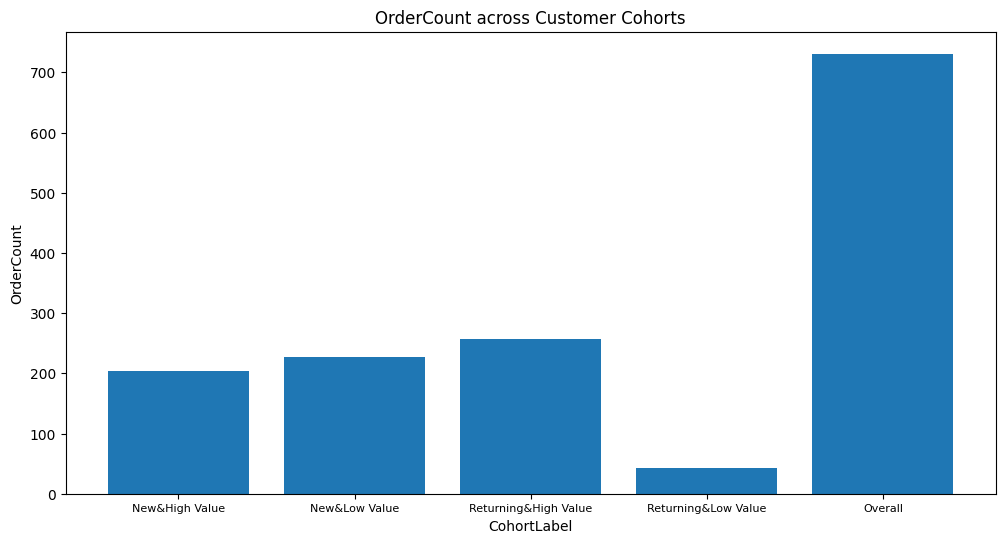

In [383]:
column_to_plot = 'OrderCount'
x_labels = segstats['CohortLabel']
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(x_labels, segstats[column_to_plot])
plt.xlabel('CohortLabel')
plt.ylabel(column_to_plot)
plt.title(f'{column_to_plot} across Customer Cohorts')
plt.xticks(fontsize=8)
plt.show()